In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
ckd=pd.read_csv("C:/Users/Hassan Ahmed/Desktop/Data Science Cohort-1 FTI/Cricket.csv")

# Knowing This Data Set

In [3]:
# Getting an overview of the data
ckd.head(10)

,ConsecutiveWins,Season,Opposition_Others,Country,Ground,Home_Ground,Day_Night,PitchReport,BattingFirst,Combination Changed,Pak_Win
0,0,Summer,New Zealand,New Zealand,Wellington,No,Yes,bouncy,Yes,No,No
1,0,Summer,New Zealand,South Africa,Queenstown,No,No,bouncy,Yes,No,No
2,0,Summer,New Zealand,New Zealand,Christchurch,No,Yes,bouncy,Yes,No,Yes
3,1,Summer,New Zealand,New Zealand,Napier,No,Yes,bouncy,No,No,Yes
4,2,Summer,New Zealand,New Zealand,Hamilton,No,Yes,bouncy,Yes,No,Yes
5,3,Summer,New Zealand,New Zealand,Auckland,No,No,bouncy,No,No,No
6,0,Winter,Others,SriLanka,Hambantota,No,Yes,dry,Yes,Yes,Yes
7,1,Winter,Sri Lanka,SriLanka,Colombo (RPS),No,Yes,dry,Yes,No,Yes
8,2,Spring,Others,SriLanka,Colombo (RPS),No,Yes,dry,Yes,Yes,45
9,3,Autumn,New Zealand,SriLanka,Pallekele,No,Yes,dry,No,NaN,No


In [4]:
# Getting basic description of the data
ckd.describe()

,ConsecutiveWins,Season,Opposition_Others,Country,Ground,Home_Ground,Day_Night,PitchReport,BattingFirst,Combination Changed,Pak_Win
count,95,94,94,95,95,94,95,95,94,12,94
unique,10,4,10,10,37,1,2,6,2,2,4
top,0,Spring,Sri Lanka,UAE,Dhaka,No,Yes,dry,No,No,Yes
freq,43,35,22,26,10,94,60,39,47,9,49


In [5]:
# Checking the data type and no. of values in all the columns
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 11 columns):
ConsecutiveWins         95 non-null object
Season                  94 non-null object
Opposition_Others       94 non-null object
Country                 95 non-null object
Ground                  95 non-null object
Home_Ground             94 non-null object
Day_Night               95 non-null object
PitchReport             95 non-null object
BattingFirst            94 non-null object
Combination Changed     12 non-null object
Pak_Win                 94 non-null object
dtypes: object(11)
memory usage: 8.3+ KB


# Checking all the null values


In [6]:
ckd.isnull().sum()

ConsecutiveWins          0
Season                   1
Opposition_Others        1
Country                  0
Ground                   0
Home_Ground              1
Day_Night                0
PitchReport              0
BattingFirst             1
Combination Changed     83
Pak_Win                  1
dtype: int64

In [7]:
ckd.columns

Index(['ConsecutiveWins', 'Season', 'Opposition_Others', 'Country', 'Ground',
       'Home_Ground', 'Day_Night', 'PitchReport', 'BattingFirst',
       'Combination Changed ', 'Pak_Win'],
      dtype='object')

## Changing Column Names Where Required

In [8]:
ckd.rename(columns={'ConsecutiveWins':'Consecutive_wins', 'Opposition_Others':'Opposition','Day_Night':'One_day','PitchReport':'Pitch_report','BattingFirst':'Batting_first'
                   ,'Combination Changed ':'Combination_changed'},inplace=True)

# Handling Missing Values

### Consecutive Wins

In [9]:
# Handling all the incorrect values in Consecutive Wins columns
cnt=0
for row in ckd['Consecutive_wins']:
    try:
        int(row)==row
        pass
    except ValueError:
        ckd.loc[cnt,'Consecutive_wins']=0
    cnt+=1

In [10]:
# Changing data type to integer
ckd["Consecutive_wins"]=ckd["Consecutive_wins"].astype("int64")

### Season

In [11]:
# Changing data type to categorical
ckd["Season"]=pd.Categorical(ckd.Season,['Summer', 'Winter', 'Spring', 'Autumn'],ordered=False)

In [12]:
# Filling the values with last valid Season
ckd['Season'].fillna(method="ffill",inplace=True)

### Opposition

In [13]:
cnt=0
for row in ckd["Opposition"]:
    if ckd.loc[cnt,"Opposition"]=="Others":
        #print("yes")
        ckd.loc[cnt,"Opposition"]="Lower Ranked Team"


### Country

In [14]:
# Clearing any entry which is number which is not possible in this column
cnt=0
for row in ckd["Country"]:
    if any(c.isnumeric() for c in str(row)):
        ckd.loc[cnt,"Country"]=np.nan
    cnt+=1
ckd=ckd.dropna(how="any",subset=["Country"])
ckd=ckd.reset_index(drop=True)

### Ground

In [15]:
# Clearing any entry which is number which is not possible in this column
cnt=0
for row in ckd["Ground"]:
    if any(c.isnumeric() for c in str(row)):
        ckd.loc[cnt,"Ground"]=np.nan
    cnt+=1
ckd=ckd.dropna(how="any",subset=["Ground"])
ckd=ckd.reset_index(drop=True)

### Home Ground

In [16]:
# Clearing any entry which is number which is not possible in this column
cnt=0
for row in ckd["Home_Ground"]:
    if any(c.isnumeric() for c in str(row)):
        ckd.loc[cnt,"Home_Ground"]=np.nan
    cnt+=1
ckd=ckd.dropna(how="any",subset=["Home_Ground"])
ckd=ckd.reset_index(drop=True)

In [17]:
# Changing Data Type for future analysis
ckd["Home_Ground"].replace(("Yes","No"),(1,0),inplace=True)
ckd["Home_Ground"]=ckd["Home_Ground"].astype("int")

### One Day

In [18]:
# Clearing any entry which is number which is not possible in this column
cnt=0
for row in ckd["One_day"]:
    if any(c.isnumeric() for c in str(row)):
        ckd.loc[cnt,"One_day"]=np.nan
    cnt+=1
ckd=ckd.dropna(how="any",subset=["One_day"])
ckd=ckd.reset_index(drop=True)

In [19]:
# Changing Data Type for future analysis
ckd["One_day"].replace(("Yes","No"),(1,0),inplace=True)
ckd["One_day"]=ckd["One_day"].astype("int")

### Pitch Report

In [20]:
ckd["Pitch_report"]=pd.Categorical(ckd.Pitch_report,['bouncy', 'dry', 'slow', 'green', 'glow'],ordered=False)

In [21]:
ckd["Pitch_report"].fillna(method="ffill",inplace=True)

### Batting First

In [22]:
# Clearing any entry which is number which is not possible in this column
cnt=0
for row in ckd["Batting_first"]:
    if any(c.isnumeric() for c in str(row)):
        ckd.loc[cnt,"Batting_first"]=np.nan
    cnt+=1
ckd=ckd.dropna(how="any",subset=["Batting_first"])
ckd=ckd.reset_index(drop=True)

In [23]:
# Changing Data Type for future analysis
ckd["Batting_first"].replace(("Yes","No"),(1,0),inplace=True)
ckd["Batting_first"]=ckd["Batting_first"].astype("int")

### Combination Changed

In [24]:
ckd["Combination_changed"].fillna("No",inplace=True)

In [25]:
# Changing Data Type for future analysis
ckd["Combination_changed"].replace(("Yes","No"),(1,0),inplace=True)
ckd["Combination_changed"]=ckd["Combination_changed"].astype("int")

### Pak Win

In [26]:
# Clearing any entry which is number which is not possible in this column
cnt=0
for row in ckd["Pak_Win"]:
    if any(c.isnumeric() for c in str(row)):
        ckd.loc[cnt,"Pak_Win"]=np.nan
    cnt+=1

In [27]:
ckd["Pak_Win"]=pd.Categorical(ckd.Pak_Win,["Yes","No"],ordered=False)

In [28]:
ckd=ckd.dropna(how="any",subset=["Pak_Win"])
ckd=ckd.reset_index(drop=True)

In [29]:
# Changing Data Type to int for future analysis
ckd["Pak_Win"].replace(("Yes","No"),(1,0),inplace=True)
ckd["Pak_Win"]=ckd["Pak_Win"].astype("int")

In [30]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 11 columns):
Consecutive_wins       92 non-null int64
Season                 92 non-null category
Opposition             92 non-null object
Country                92 non-null object
Ground                 92 non-null object
Home_Ground            92 non-null int32
One_day                92 non-null int32
Pitch_report           92 non-null category
Batting_first          92 non-null int32
Combination_changed    92 non-null int32
Pak_Win                92 non-null int32
dtypes: category(2), int32(5), int64(1), object(3)
memory usage: 5.4+ KB


# Univariate Analysis

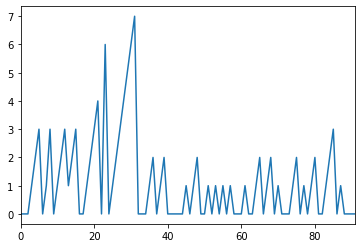

In [31]:
ckd["Consecutive_wins"].plot(kind="line")

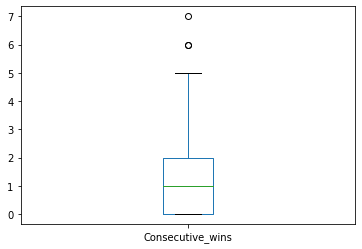

In [32]:
ckd["Consecutive_wins"].plot(kind="box")

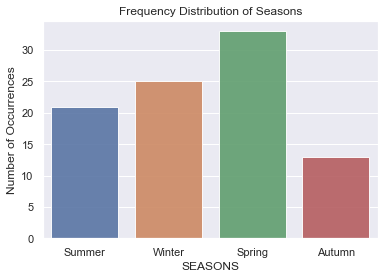

In [33]:
S_count = ckd['Season'].value_counts()
sns.set(style="darkgrid")
sns.barplot(S_count.index,S_count.values, alpha=0.9)
plt.title('Frequency Distribution of Seasons')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('SEASONS', fontsize=12)
plt.show()

In [ ]:
HG_count = ckd['Home_Ground'].value_counts()
sns.set(style="darkgrid")
sns.barplot(HG_count.index,HG_count.values, alpha=0.9)
plt.title('Frequency Distribution of Picth Report')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Pitch Reports', fontsize=12)
plt.show()

In [ ]:
# Here 1 means Yes and 0 means no
OD_count = ckd['One_day'].value_counts()
sns.set(style="darkgrid")
sns.barplot(OD_count.index,OD_count.values, alpha=0.9)
plt.title('Frequency Distribution of One Days of Not')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('One Day or Not', fontsize=12)
plt.show()

In [ ]:
print(ckd['Pitch_report'].value_counts())

In [ ]:
# Here 1 means Yes and 0 means no
PR_count = ckd['Pitch_report'].value_counts()
sns.set(style="darkgrid")
sns.barplot(PR_count.index,PR_count.values, alpha=0.9)
plt.title('Frequency Distribution of Picth Report')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Pitch Reports', fontsize=12)
plt.show()

In [ ]:
# Here 1 means Yes and 0 means no
BF_count = ckd['Batting_first'].value_counts()
sns.set(style="darkgrid")
sns.barplot(BF_count.index,BF_count.values, alpha=0.9)
plt.title('Frequency Distribution of Batting First or Not')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Batting First or Not', fontsize=12)
plt.show()

In [ ]:
# Here 1 means Yes and 0 means no
CC_count = ckd['Combination_changed'].value_counts()
sns.set(style="darkgrid")
sns.barplot(CC_count.index,CC_count.values, alpha=0.9)
plt.title('Frequency Distribution of Cominational Changes or Not')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Combinational Changes or Not', fontsize=12)
plt.show()

In [ ]:
# Here 1 means Yes and 0 means no
PW_count = ckd['Pak_Win'].value_counts()
sns.set(style="darkgrid")
sns.barplot(PW_count.index,PW_count.values, alpha=0.9)
plt.title('Frequency Distribution of Pakistan Wins')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Pakistan Wins', fontsize=12)
plt.show()

# Correlation

In [ ]:
ck=ckd.corr(method='pearson')
ck

In [ ]:
sns.heatmap(ck, annot=True, cmap=plt.cm.Reds)
plt.savefig('Cricket Correlation.png')

# Installing Pandas Profilling Library

In [ ]:
conda install -c conda-forge pandas-profiling

In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport

# Building an Interactive Report

In [ ]:
profile = ProfileReport(ckd, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [ ]:
ckd.profile_report(style={'full_width':True})

In [ ]:
profile = ckd.profile_report()
rejected_variables = profile.get_rejected_variables(threshold=0.9)

In [ ]:
profile = ckd.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="Cricket Report.html")

In [ ]:
ckd.to_csv("C:/Users/Hassan Ahmed/Desktop/Data Science Cohort-1 FTI/cricket_clean.csv",index=False)